In [192]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [193]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [194]:
NUM_CLASSES = 4

# 学習データ読み込み

In [195]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [196]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [198]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [199]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_18 (Dropout)        (None, 42)                0         
                                                                 
 dense_27 (Dense)            (None, 20)                860       
                                                                 
 dropout_19 (Dropout)        (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [201]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/15 [=>............................] - ETA: 4s - loss: 1.3270 - accuracy: 0.3828
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 10ms/step - loss: 1.2609 - accuracy: 0.4745 - val_loss: 1.2057 - val_accuracy: 0.6266
Epoch 2/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.2047 - accuracy: 0.5234
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 1.1270 - accuracy: 0.6011 - val_loss: 1.0651 - val_accuracy: 0.6297
Epoch 3/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9804 - accuracy: 0.6719
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 1.0289 - accuracy: 0.6309 - val_loss: 0.9700 - val_accuracy: 0.6297
Epoch 4/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9692 - accuracy: 0.6719


c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 5/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.0055 - accuracy: 0.5938
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 0.9270 - accuracy: 0.6376 - val_loss: 0.8797 - val_accuracy: 0.6297
Epoch 6/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.8793 - accuracy: 0.6641
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 0.9097 - accuracy: 0.6371 - val_loss: 0.8554 - val_accuracy: 0.6297
Epoch 7/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.8702 - accuracy: 0.6719
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 0.8646 - accuracy: 0.6475 - val_loss: 0.8327 - val_accuracy: 0.6297
Epoch 8/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7381 - accuracy: 0.7422
E

In [ ]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 839us/step - loss: 0.3390 - accuracy: 0.9328


In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 35ms/step
[7.9354650e-01 7.6584159e-03 2.0951020e-07 1.8012166e-01 1.7135786e-02
 1.5232154e-03 1.4167643e-05]
0


# 混同行列

46/46 [==============================] - 0s 591us/step


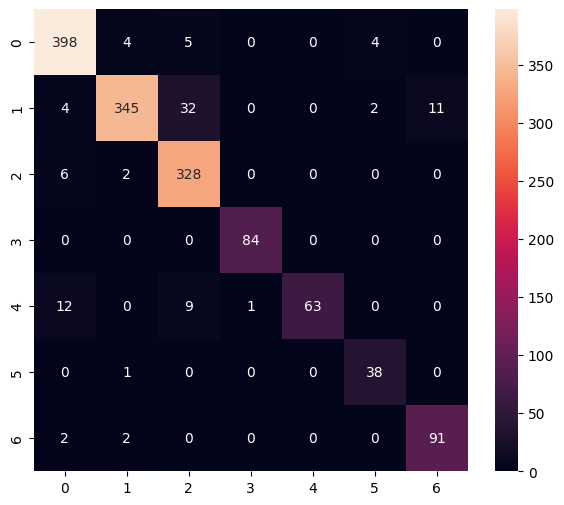

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       411
           1       0.97      0.88      0.92       394
           2       0.88      0.98      0.92       336
           3       0.99      1.00      0.99        84
           4       1.00      0.74      0.85        85
           5       0.86      0.97      0.92        39
           6       0.89      0.96      0.92        95

    accuracy                           0.93      1444
   macro avg       0.93      0.93      0.93      1444
weighted avg       0.94      0.93      0.93      1444



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmpx82f_z_m\assets


INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmpx82f_z_m\assets


6740

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.9354644e-01 7.6584145e-03 2.0950999e-07 1.8012181e-01 1.7135799e-02
 1.5232138e-03 1.4167655e-05]
0
